# LAB | Imbalanced

In [81]:
%cd E:\Desktop\IH\lab-imbalanced
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

E:\Desktop\IH\lab-imbalanced


C:\Users\Clemens Fritzen\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [82]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [83]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model?
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

# Imbalance


In [84]:
fraud.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

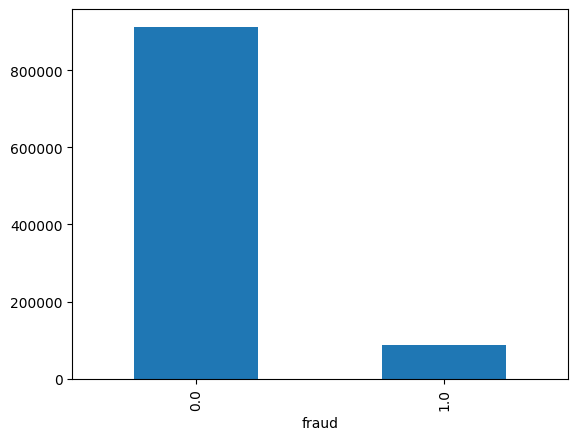

In [85]:
fraudcases=fraud["fraud"].value_counts()
fraudcases.plot(kind="bar")
plt.show()

# LogisiticClassification on imbalanced data

In [86]:
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


features=fraud.drop(columns="fraud")
target=fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

scaler=MinMaxScaler()
scaler.fit(X_train)


X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [87]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [88]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97    227952
         1.0       0.92      0.40      0.56     22048

    accuracy                           0.94    250000
   macro avg       0.93      0.70      0.77    250000
weighted avg       0.94      0.94      0.93    250000



# Oversampling


In [89]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)

train["fraud"] = y_train.values

fraud_yes = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]

In [90]:
fraud_oversampled= resample(fraud_yes,
                          replace=True,
                          n_samples = len(no_fraud),
                          random_state=0)
train_over = pd.concat([fraud_oversampled, no_fraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
30867,0.021038,0.000009,0.018281,1.0,0.0,0.0,1.0,1.0
498078,0.005190,0.000224,0.015399,1.0,0.0,0.0,1.0,1.0
486824,0.001375,0.000067,0.019280,1.0,1.0,0.0,1.0,1.0
600375,0.000882,0.008611,0.003106,1.0,0.0,0.0,1.0,1.0
524628,0.013736,0.000164,0.006119,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
749995,0.004472,0.000012,0.001564,1.0,1.0,0.0,0.0,0.0
749996,0.002143,0.000099,0.003802,1.0,1.0,0.0,1.0,0.0
749997,0.000280,0.000044,0.004183,1.0,0.0,0.0,0.0,0.0
749998,0.003366,0.000191,0.008504,1.0,1.0,0.0,1.0,0.0


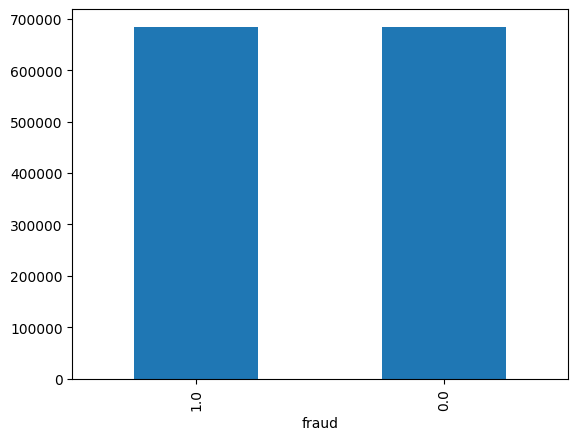

In [91]:
fraudcases=train_over["fraud"].value_counts()
fraudcases.plot(kind="bar")
plt.show()

In [92]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [93]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [94]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

C:\Users\Clemens Fritzen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96    227952
         1.0       0.54      0.93      0.69     22048

    accuracy                           0.92    250000
   macro avg       0.77      0.93      0.82    250000
weighted avg       0.95      0.92      0.93    250000



# Undersampling

In [95]:
no_fraud_undersampled= resample(no_fraud,
                                replace=False,
                                n_samples = len(fraud_yes),
                                random_state=0)
no_fraud_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
537274,0.003674,0.000432,0.004970,1.0,1.0,0.0,1.0,0.0
147853,0.004719,0.000080,0.000739,1.0,0.0,0.0,1.0,0.0
727687,0.002767,0.000052,0.001973,1.0,1.0,0.0,1.0,0.0
166046,0.000847,0.006403,0.001350,1.0,0.0,0.0,0.0,0.0
317143,0.001288,0.000003,0.005491,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
700632,0.002235,0.000031,0.003946,1.0,0.0,0.0,1.0,0.0
671308,0.000938,0.000154,0.002165,1.0,0.0,1.0,0.0,0.0
626818,0.002935,0.000060,0.002778,1.0,1.0,0.0,1.0,0.0
732729,0.000894,0.000042,0.009954,1.0,1.0,0.0,0.0,0.0


In [96]:
train_under = pd.concat([no_fraud_undersampled, fraud_yes])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
537274,0.003674,0.000432,0.004970,1.0,1.0,0.0,1.0,0.0
147853,0.004719,0.000080,0.000739,1.0,0.0,0.0,1.0,0.0
727687,0.002767,0.000052,0.001973,1.0,1.0,0.0,1.0,0.0
166046,0.000847,0.006403,0.001350,1.0,0.0,0.0,0.0,0.0
317143,0.001288,0.000003,0.005491,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
749893,0.042690,0.000235,0.003274,1.0,0.0,0.0,1.0,1.0
749906,0.002668,0.010546,0.002166,1.0,0.0,0.0,1.0,1.0
749946,0.002899,0.000168,0.023395,1.0,0.0,0.0,1.0,1.0
749951,0.000349,0.000029,0.026772,1.0,0.0,0.0,1.0,1.0


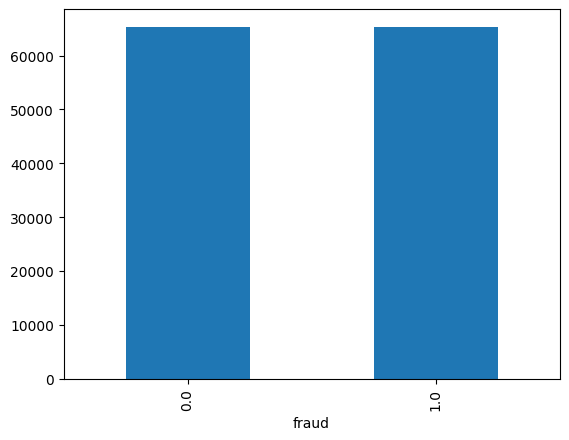

In [97]:
frauds_plt = train_under["fraud"].value_counts()
frauds_plt.plot(kind="bar")
plt.show()

In [98]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [99]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [100]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

C:\Users\Clemens Fritzen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94    227952
         1.0       0.46      0.91      0.61     22048

    accuracy                           0.90    250000
   macro avg       0.73      0.91      0.78    250000
weighted avg       0.94      0.90      0.91    250000



# SMOTE

In [103]:
!pip install imblearn
from imblearn.over_sampling import SMOTE



In [104]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [105]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [106]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [107]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96    227952
         1.0       0.54      0.93      0.69     22048

    accuracy                           0.93    250000
   macro avg       0.77      0.93      0.82    250000
weighted avg       0.95      0.93      0.93    250000

